# Linear Regression Implementation

In this homework, you need to implement LR algorithm.
* Generate data
* Implement LinearRegression class methods
* Visualize results

### Imports

In [222]:
import numpy as np 
import matplotlib.pyplot as plt

#### 1. Generate data
* Generate 200 points uniform randomly in range [0,1] and assign it to X (keep random seed)
* Fix b_0 and b_1
* Generate Y line with X, b_0 and b_1
* Add random noise from normal distribution, with (0,0.4) (keep random seed)
* Plot results
* Concatenate ones in X

array([2.97298106, 7.06143172])

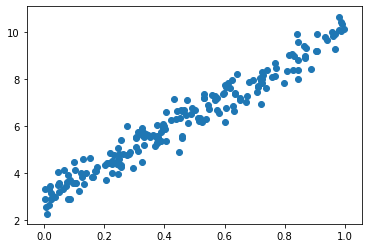

In [233]:
#code here
#keep rndom seed
np.random.seed(64)
X = np.random.uniform(0, 1, 200)   #generated X matrix
e = np.random.normal(0, 0.4, 200)  #generated e(epsilon) matrix
#fixed b_0 and b_1
b_0 = 3 
b_1 = 7
#creating y matrix
Y = []
for i in range(len(X)):
    Y = np.append(Y, b_0 + b_1 * X[i] + e[i])

#results plot
plt.scatter(X, Y)

#concatenating ones in X
new_X = X
new_X = np.append(np.ones(len(X)).reshape(len(X), 1), new_X.reshape(len(X), 1), axis = 1)

#and now getting betta matrix 
betta = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(new_X), new_X)), np.transpose(new_X)), Y)
betta


#### Implement main LinearRegression class

In [234]:
class LinearRegression:
    """
    Linear Regression Class
    You need to implement LR algorithm with 2 different methods(analytical sol. and Gradient Descent)

    """

    def __init__(self):
        """
        Init method
        """
        self.betta_l = None  #least_squares' betta
        self.betta_g = None  #gradient_descent's betta
        self.alpha = None
        self.delta = None
        #self.X = np.append(np.ones(len(X)).reshape(len(X), 1), X.reshape(len(X), 1), axis = 1)

    def fit_least_squares(self, X, Y):
        """
        Main fit method.
        Method takes X, Y parameters, find optimal bettas(with analytical solution) and return it
        :param X: (np.array,n*p) features
        :param Y: (np.array,n*1) target variable
        :return: betta (np.array,p*1) 
        """
        X_ = np.append(np.ones(len(X)).reshape(len(X), 1), X.reshape(len(X), 1), axis = 1)
        self.betta_l = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X_), X_)), np.transpose(X_)), Y.reshape(len(Y), 1))
        return self.betta_l

    def fit_gradient_descent(self, X, Y, alpha, delta):
        """
        Fit with gradient descent optimizer
        Method takes X, Y and method parameters, find optimal bettas(with gradient descent) and return it
        :param X: (np.array,n*p) features
        :param Y: (np.array,n*1) target
        :param alpha: (float) learning rate
        :param delta: (int) threshold for minimum difference between betta_i and betta_i+1
        :return: betta (np.array,p*1) 
        """
        X_ = np.append(np.ones(len(X)).reshape(len(X), 1), X.reshape(len(X), 1), axis = 1)
        self.alpha = alpha
        self.delta = delta
        self.betta_g = np.zeros(len(X_[0])).reshape(len(X_[0]), 1)
        betta = np.ones(len(X_[0])).reshape(len(X_[0]), 1)
        while np.sqrt(sum((self.betta_g - betta)**2)) >= delta:
            betta = self.betta_g
            gLoss = (sum((np.dot(X_, self.betta_g) - Y.reshape(len(Y), 1)) * X_) / len(X_)).reshape(len(self.betta_g), 1)
            self.betta_g = betta - alpha * gLoss
        return self.betta_g
            
    def predict(self, X, gradient = True):
        """
        Make prediction with fitted bettas 
        :param X: (np.array,n*p) features
        :param graient: (bool) true if we want too use bettas from gradint descent(else for least_squares)
        :return: Y_pred (np.array,n*1) predictions
        """
        X_ = np.append(np.ones(len(X)).reshape(len(X), 1), X.reshape(len(X), 1), axis = 1)
        if gradient == True:
            betta = self.betta_g
        else:
            betta = self.betta_l
            
        Y_pred = np.dot(X_, betta)
        return Y_pred
    
    def loss(self, X, Y, gradient = True):
        """
        Method for calculation current loss
        Need to implement Mean Square Error Loss
        :param X: (np.array,n*p) features
        :param Y: (np.array,n*1) target
        :return: (float) Mean Squared Error Loss
        """
        Y_pred = self.predict(X, gradient)
        Y = Y.reshape(len(Y), 1)
        L = ((Y - Y_pred) ** 2).sum()
        return L / (2 * len(Y))

    def plot_line(self, X, Y):
        """
        Method plots data points and approximated lines for both methods(in one figure)
        :return: None 
        """
        fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
       
        axes[0].scatter(X, Y)
        axes[0].set_title("Least Squares")
        axes[0].plot(X, self.predict(X, False), "r", linewidth = 3)
        
        axes[1].scatter(X, Y)
        axes[1].set_title("Gradient Descent")
        axes[1].plot(X, self.predict(X, True), "r", linewidth = 3)

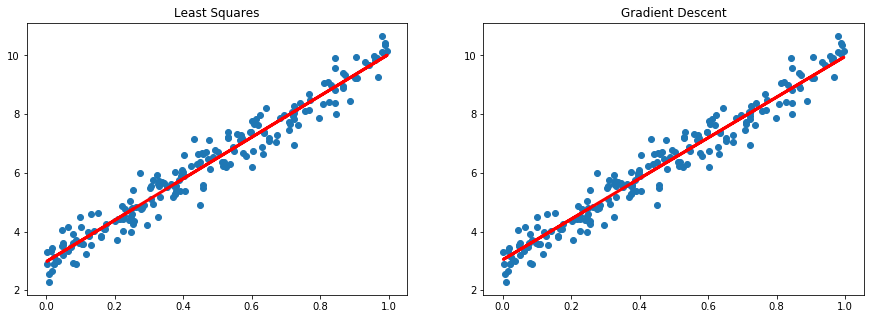

In [235]:
model = LinearRegression()
model.fit_least_squares(X, Y)
model.fit_gradient_descent(X, Y, 0.1, 0.001) #alpha = 0.1   delta = 0.001
model.predict(X, False) # to enable betta calculation by least squares function, give false as the second parameter to the predict function,
                        # otherwise the betta calculation will be by the gradient descent function  

model.loss(X, Y, False) # to enable betta calculation by least squares function, give false as the second parameter to the predict function,
                        # otherwise the betta calculation will be by the gradient descent function 
model.plot_line(X, Y)